TypeError: Invalid shape (3, 655, 562) for image data

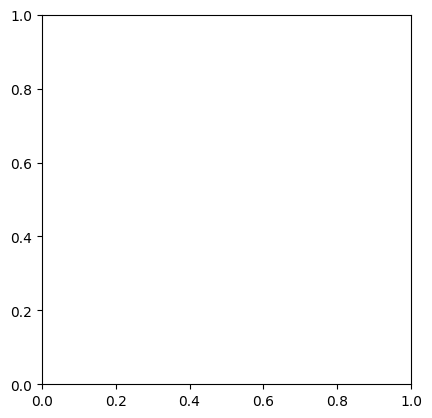

In [55]:
from osgeo import gdal, gdalconst
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

def get_color_sentinel_img(blue_img_path, green_img_path, red_img_path):
    """
    Returns an RGB image based on RGB bands of Sentinel image and plots it.

    Parameters
    ----------
    blue_img_path : str
        Path to the blue Sentinel band image.
    green_img_path : str
        Path to the green Sentinel band image.
    red_img_path : str
        Path to the red Sentinel band image.

    Returns
    -------
    None
    """
    paths = [blue_img_path, green_img_path, red_img_path]
    channels = []
    for path in paths:
        img = gdal.Open(path, gdalconst.GA_ReadOnly)
        img_array = img.ReadAsArray()
        img_array = xr.DataArray(data=img_array, dims=["y", "x"])
        channels.append(img_array)
    
    # Stellen Sie sicher, dass die true_color Funktion ordnungsgemäß definiert ist oder ersetzen Sie diesen Teil 
    # mit einer entsprechenden Funktion, die ein RGB-Bild aus den Kanälen erstellt.
    color_image = np.stack((channels[2], channels[1], channels[0])) # Stacking in the order R, G, B

    # Plot the image
    plt.imshow(color_image)
    plt.title('Sentinel-2 RGB Image')
    plt.xlabel('Pixel')
    plt.ylabel('Pixel')
    plt.show()

# Beispielaufruf der Funktion
get_color_sentinel_img('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C1/b4/lrs/S2A_MSIL2A_20190416T105031_N0211_R051_T31UFT_20190416T133651.jp2',
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C1/b3/lrs/S2A_MSIL2A_20190416T105031_N0211_R051_T31UFT_20190416T133651.jp2', 
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C1/b4/lrs/S2A_MSIL2A_20190416T105031_N0211_R051_T31UFT_20190416T133651.jp2')


TypeError: Invalid shape (3, 655, 655) for image data

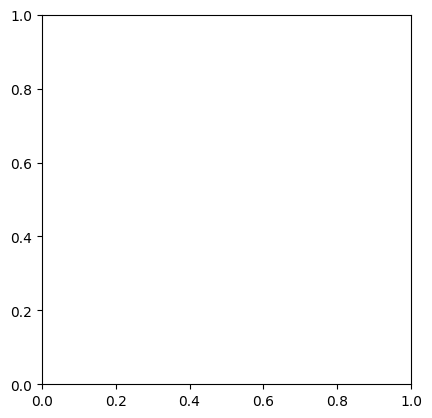

In [44]:
from osgeo import gdal, gdalconst
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


def scale_to_8bit(data, max_value=16068):
    """
    Skaliert die Bilddaten auf den 8-Bit-Bereich (0-255).

    Parameters:
    data (numpy.array): Die Bilddaten als NumPy-Array.
    max_value (int): Der maximale Wert in den Originaldaten, standardmäßig 16068.

    Returns:
    numpy.array: Die skalierten Bilddaten im Bereich von 0 bis 255.
    """
    # Normalisiere auf den Bereich von 0 bis 1
    data_normalized = data / max_value
    
    # Skaliere auf den Bereich von 0 bis 255
    data_8bit = (data_normalized * 255).astype(np.uint8)
    
    return data_8bit

# Die Daten aus Ihrem Bild laden
# data = ...  # Hier sollten Sie Ihr Array einfügen

# Die Funktion aufrufen
# data_8bit = scale_to_8bit(data)


def normalize_band_z_score(data_array):
    """ Normalisiert die Daten eines Satellitenbildbandes mit Z-Score-Normalisierung. """
    mean = np.mean(data_array)
    std = np.std(data_array)
    normalized = (data_array - mean) / std
    return normalized

def normalize_band(data_array):
    """ Normalisiert die Daten eines Satellitenbildbandes. """
    # Werte auf den Bereich 0 bis 1 skalieren
    normalized = (data_array - data_array.min()) / (data_array.max() - data_array.min())
    return normalized

def normalize_band(blue_img_path, green_img_path, red_img_path):
    """
    Returns an RGB image based on normalized RGB bands of Sentinel image and plots it.

    Parameters
    ----------
    blue_img_path : str
        Path to the blue Sentinel band image.
    green_img_path : str
        Path to the green Sentinel band image.
    red_img_path : str
        Path to the red Sentinel band image.

    Returns
    -------
    None
    """
    paths = [blue_img_path, green_img_path, red_img_path]
    normalized_channels = []
    
    for path in paths:
        img = gdal.Open(path, gdalconst.GA_ReadOnly)
        img_array = img.ReadAsArray()
        img_data_array = xr.DataArray(data=img_array, dims=["y", "x"])
        normalized_img_data_array = scale_to_8bit(img_data_array)
        normalized_channels.append(normalized_img_data_array)
    
    # Anwendung der true_color Funktion mit normalisierten Kanälen
    color_image = np.stack((normalized_channels[2], normalized_channels[1], normalized_channels[0]), axis=-1)


    # Bild plotten
    plt.imshow(color_image)
    plt.title('Normalized Sentinel-2 RGB Image')
    plt.xlabel('Pixel')
    plt.ylabel('Pixel')
    plt.show()

# Beispielaufruf der Funktion mit korrekten Pfaden für jedes Band
get_color_sentinel_img('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b4/lrs/S2A_MSIL2A_20190416T105031_N0211_R051_T31UFT_20190416T133651.jp2',
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b3/lrs/S2A_MSIL2A_20190416T105031_N0211_R051_T31UFT_20190416T133651.jp2', 
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b2/lrs/S2A_MSIL2A_20190416T105031_N0211_R051_T31UFT_20190416T133651.jp2')


In [30]:
import rasterio

def print_tiff_values(tiff_path):
    """
    Liest die Pixelwerte einer TIFF-Datei und druckt sie aus.

    Parameters:
    tiff_path (str): Der Pfad zur TIFF-Datei.
    """
    with rasterio.open(tiff_path) as src:
        # Lies das erste Band der TIFF-Datei
        data = src.read(1)
        print(data)
        print(data.shape)
        print(np.max(data))
        print(np.min(data))

# Beispielaufruf der Funktion
print_tiff_values('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_4.tiff')


[[67 62 58 ... 19 21 16]
 [58 57 54 ... 25 25 18]
 [62 53 39 ... 27 26 21]
 ...
 [21 22 28 ... 21 22 23]
 [24 25 30 ... 21 23 22]
 [29 27 29 ... 21 21 22]]
(1965, 1965)
244
8


In [31]:
import rasterio

def print_tiff_values(tiff_path):
    """
    Liest die Pixelwerte einer TIFF-Datei und druckt sie aus.

    Parameters:
    tiff_path (str): Der Pfad zur TIFF-Datei.
    """
    with rasterio.open(tiff_path) as src:
        # Lies das erste Band der TIFF-Datei
        data = src.read(1)
        print(data)
        print(data.shape)
        print(np.max(data))
        print(np.min(data))

# Beispielaufruf der Funktion
print_tiff_values('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b4/lrs/S2B_MSIL2A_20190401T105029_N0211_R051_T31UFT_20190401T140125.jp2')


[[ 783 1019 1273 ...  682  830  785]
 [1050 1266 1299 ...  844  856  779]
 [1233 1063  826 ...  901  847  649]
 ...
 [ 175  226  197 ...  213  215  215]
 [ 188  218  194 ...  207  209  208]
 [ 201  207  193 ...  203  204  203]]
(655, 655)
16068
0


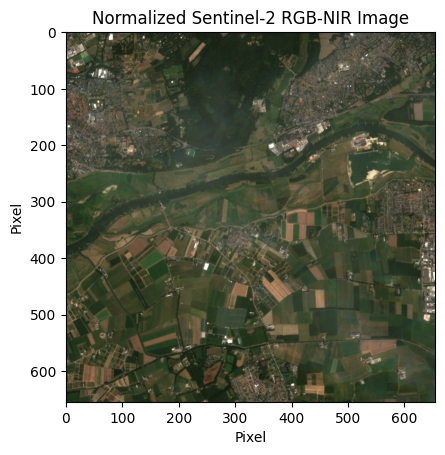

In [75]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt

def scale_to_8bit(data_array, max_value=3000):
    """ Skaliert die Bilddaten auf den 8-Bit-Bereich (0-255). """
    data_array = np.clip(data_array, 0, max_value)  # Werte über max_value abschneiden
    normalized = data_array / max_value  # Normalisiere auf den Bereich von 0 bis 1
    return (normalized * 255).astype(np.uint8)  # Skaliere auf den Bereich von 0 bis 255

def get_color_sentinel_img(blue_img_path, green_img_path, red_img_path):
    """
    Returns an RGB image based on normalized RGB bands of Sentinel image,
    including NIR band and plots it.

    Parameters
    ----------
    blue_img_path : str
        Path to the blue Sentinel band image.
    green_img_path : str
        Path to the green Sentinel band image.
    red_img_path : str
        Path to the red Sentinel band image.
    nir_img_path : str
        Path to the NIR Sentinel band image.

    Returns
    -------
    None
    """
    paths = [blue_img_path, green_img_path, red_img_path]
    scaled_channels = []
    
    for path in paths:
        with rasterio.open(path) as src:
            # Lies das Band der TIFF-Datei
            img_array = src.read(1, resampling=Resampling.bilinear)
            scaled_channel = scale_to_8bit(img_array)
            scaled_channels.append(scaled_channel)
    
    # Stapeln der skalierten Kanäle zu einem RGB-NIR-Bild
    rgb_nir_image = np.stack(scaled_channels, axis=-1)
    plt.imsave('/home/jovyan/work/saved_data/simg-benchmark/s2.png', rgb_nir_image)

    # Bild plotten
    # Beachten Sie, dass die NIR-Information hier nicht im RGB-Bild dargestellt wird,
    # da RGB-Bilder nur drei Kanäle haben. Sie müssten sich überlegen, wie Sie die NIR-Information
    # visualisieren möchten, z.B. durch Erstellung eines Falschfarbenbildes.
    plt.imshow(rgb_nir_image)  # Nur die ersten drei Kanäle für das RGB-Bild verwenden
    plt.title('Normalized Sentinel-2 RGB-NIR Image')
    plt.xlabel('Pixel')
    plt.ylabel('Pixel')
    plt.show()

# Beispielaufruf der Funktion mit korrekten Pfaden für jedes Band
get_color_sentinel_img('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b4/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b3/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2', 
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b2/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',)


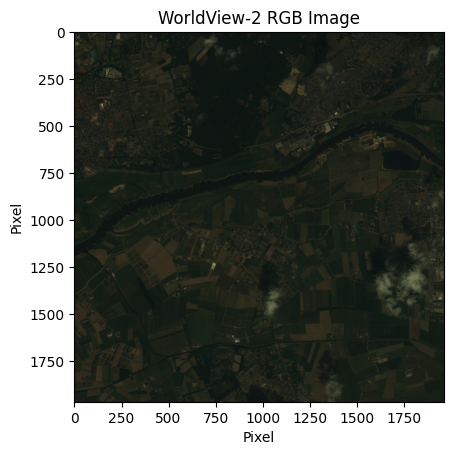

In [5]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np

def plot_wv2_rgb(red_path, green_path, blue_path):
    """
    Plots the RGB channels of a WorldView-2 image, with each channel in a separate file.
    
    Parameters:
    red_path (str): Pfad zur Datei des Rotkanals.
    green_path (str): Pfad zur Datei des Grünkanals.
    blue_path (str): Pfad zur Datei des Blaukanals.
    """
    # Rotkanal lesen
    with rasterio.open(red_path) as src:
        red = src.read(1)  # Annahme: das relevante Band ist das erste Band

    # Grünkanal lesen
    with rasterio.open(green_path) as src:
        green = src.read(1)  # Annahme: das relevante Band ist das erste Band

    # Blaukanal lesen
    with rasterio.open(blue_path) as src:
        blue = src.read(1)  # Annahme: das relevante Band ist das erste Band

    # RGB-Bild zusammensetzen
    rgb = np.dstack((red, green, blue))
    plt.imsave('/home/jovyan/work/saved_data/simg-benchmark/wv2.png', rgb)


    # RGB-Bild plotten
    plt.imshow(rgb)
    plt.title('WorldView-2 RGB Image')
    plt.xlabel('Pixel')
    plt.ylabel('Pixel')
    plt.show()

# Beispielaufruf der Funktio
plot_wv2_rgb('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_4.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_2.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_1.tiff')


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scale_to_8bit(data_array, max_value=3000):
    """ Skaliert die Bilddaten auf den 8-Bit-Bereich (0-255). """
    data_array = np.clip(data_array, 0, max_value)  # Werte über max_value abschneiden
    normalized = data_array / max_value  # Normalisiere auf den Bereich von 0 bis 1
    return (normalized * 255).astype(np.uint8)  # Skaliere auf den Bereich von 0 bis 255

def load_image(red_path, green_path, blue_path):
    
    # Rotkanal lesen
    with rasterio.open(red_path) as src:
        red = src.read(1)  # Annahme: das relevante Band ist das erste Band
        #red = scale_to_8bit(red)

    # Grünkanal lesen
    with rasterio.open(green_path) as src:
        green = src.read(1)  # Annahme: das relevante Band ist das erste Band
        #green = scale_to_8bit(green)

    # Blaukanal lesen
    with rasterio.open(blue_path) as src:
        blue = src.read(1)  # Annahme: das relevante Band ist das erste Band
        #blue = scale_to_8bit(blue)
        

    # RGB-Bild zusammensetzen
    rgb = np.dstack((red, green, blue))
    
    return rgb

def split_image_into_tiles(image_np, num_tiles_row, num_tiles_col):
    """
    Zerlegt ein Bild (Numpy-Array) in eine vorgegebene Anzahl von Bildausschnitten.
    
    :param image_np: Numpy-Array des Bildes.
    :param num_tiles_row: Anzahl der Kacheln pro Reihe.
    :param num_tiles_col: Anzahl der Kacheln pro Spalte.
    :return: Liste von Bildausschnitten als Numpy-Arrays.
    """
    tiles = []
    tile_height = image_np.shape[0] // num_tiles_row
    tile_width = image_np.shape[1] // num_tiles_col
    
    for row in range(num_tiles_row):
        for col in range(num_tiles_col):
            start_row = row * tile_height
            start_col = col * tile_width
            end_row = start_row + tile_height
            end_col = start_col + tile_width
            # Schneide den Bildausschnitt aus und füge ihn der Liste hinzu
            tile = image_np[start_row:end_row, start_col:end_col]
            tiles.append(tile)
    
    return tiles

# Beispielgebrauch:
# Angenommen, `image_array` ist Ihr Bild als Numpy-Array
image_wv = load_image('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_4.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_2.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_1.tiff')

image_s2 = load_image('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b4/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b3/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2', 
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b2/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',)


num_tiles_row = 4  # Anzahl der Kacheln in der vertikalen Richtung
num_tiles_col = 4  # Anzahl der Kacheln in der horizontalen Richtung
tiles = split_image_into_tiles(image_wv, num_tiles_row, num_tiles_col)


# Zum Visualisieren der Kacheln können Sie Folgendes tun:
for i, tile in enumerate(tiles):
     plt.subplot(num_tiles_row, num_tiles_col, i + 1)
     plt.imshow(tile)
     plt.axis('off')
     plt.show()


NameError: name 'rasterio' is not defined

In [8]:
import numpy as np

def calculate_brightness(rgb_image):
    """
    Berechnet die durchschnittliche Helligkeit eines RGB-Bildes.
    :param rgb_image: Ein RGB-Bild als Numpy-Array.
    :return: Durchschnittliche Helligkeit des Bildes.
    """
    # Konvertiere das Bild zu Graustufen, indem du den Durchschnitt der drei Farbkanäle nimmst
    grayscale_image = np.mean(rgb_image, axis=2)
    # Berechne die durchschnittliche Helligkeit
    return np.mean(grayscale_image)

def adjust_brightness(rgb_image, factor):
    """
    Passt die Helligkeit eines RGB-Bildes an.
    :param rgb_image: Ein RGB-Bild als Numpy-Array.
    :param factor: Faktor, um die Helligkeit anzupassen (>1 heller, <1 dunkler).
    :return: Ein angepasstes RGB-Bild als Numpy-Array.
    """
    # Stelle sicher, dass die Operation innerhalb des gültigen Bereichs bleibt
    adjusted_image = np.clip(rgb_image * factor, 0, 255)
    return adjusted_image.astype(np.uint8)

# Angenommen, `image_array` ist Ihr RGB-Bild als Numpy-Array
wv = load_image('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_4.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_2.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_1.tiff')

s2 = load_image('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b4/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b3/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2', 
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b2/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',)

brightness = calculate_brightness(wv)
print(f'Die durchschnittliche Helligkeit des Bildes beträgt: {brightness}')

# Um die Helligkeit anzupassen, wählen Sie einen Faktor. >1 macht das Bild heller, <1 dunkler.
# factor = 1.2  # Beispiel: Erhöhen der Helligkeit um 20%
# adjusted_image = adjust_brightness(image_array, factor)


Die durchschnittliche Helligkeit des Bildes beträgt: 27.829833278299002


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def scale_to_8bit(data_array, max_value=3000):
    """ Skaliert die Bilddaten auf den 8-Bit-Bereich (0-255). """
    data_array = np.clip(data_array, 0, max_value)  # Werte über max_value abschneiden
    normalized = data_array / max_value  # Normalisiere auf den Bereich von 0 bis 1
    return (normalized * 255).astype(np.uint8)  # Skaliere auf den Bereich von 0 bis 255

def load_image(red_path, green_path, blue_path):
    
    # Rotkanal lesen
    with rasterio.open(red_path) as src:
        red = src.read(1)  # Annahme: das relevante Band ist das erste Band
        red = scale_to_8bit(red)

    # Grünkanal lesen
    with rasterio.open(green_path) as src:
        green = src.read(1)  # Annahme: das relevante Band ist das erste Band
        green = scale_to_8bit(green)

    # Blaukanal lesen
    with rasterio.open(blue_path) as src:
        blue = src.read(1)  # Annahme: das relevante Band ist das erste Band
        blue = scale_to_8bit(blue)
        

    # RGB-Bild zusammensetzen
    rgb = np.dstack((red, green, blue))
    
    return rgb

In [2]:
from satbm_utils import load_image_s2
from satbm_utils import load_image_wv
from satbm_utils import calculate_brightness
from satbm_utils import adjust_brightness
from satbm_utils import plot_image
wv = load_image_wv('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_4.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_2.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_1.tiff')

s2 = load_image_s2('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b4/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b3/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2', 
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b2/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',)

b_wv = calculate_brightness(wv)
b_s2 = calculate_brightness(s2)
scale_factor = b_s2 / b_wv

print(b_wv)
print(b_s2)

scaled_wv = adjust_brightness(wv, scale_factor)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


27.829833278299002
65.64248081891111


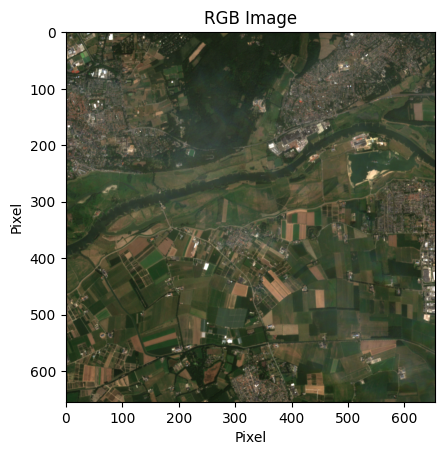

In [3]:
plot_image(s2)

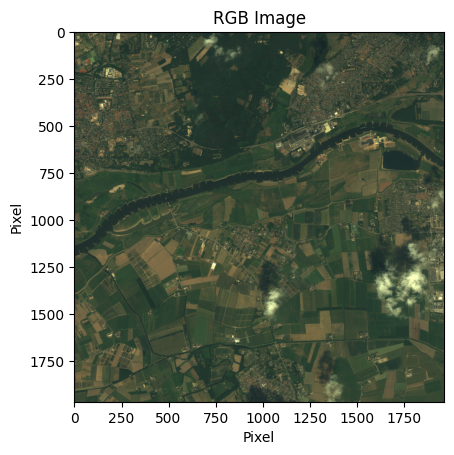

In [4]:
plot_image(scaled_wv)

In [3]:
from satbm_utils import split_image_into_tiles_save

path = "/home/jovyan/work/saved_data/HAT/datasets/Sat1/Sat1Hq"

split_image_into_tiles_save(path, scaled_wv, 3, 3)


(655, 655, 3)
(655, 655, 3)
(655, 655, 3)
(655, 655, 3)
(655, 655, 3)
(655, 655, 3)
(655, 655, 3)
(655, 655, 3)
(655, 655, 3)


In [4]:
print("hi")

hi


In [12]:
import os

def count_images_in_directory(directory):
    """
    Zählt die Anzahl der Bilddateien in einem Verzeichnis.

    Parameter:
    - directory: Der Pfad zum Verzeichnis.

    Gibt zurück:
    - Die Anzahl der Bilddateien im Verzeichnis.
    """
    # Unterstützte Bildformate
    supported_formats = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff'}
    
    # Zählen der Bilddateien
    image_count = sum(1 for file in os.listdir(directory) if os.path.splitext(file)[1].lower() in supported_formats)
    
    return image_count

# Beispielaufruf der Funktion
directory = '/home/jovyan/work/saved_data/HAT/datasets/SI3gt'
print(f"Anzahl der Bilder im Verzeichnis '{directory}': {count_images_in_directory(directory)}")


Anzahl der Bilder im Verzeichnis '/home/jovyan/work/saved_data/HAT/datasets/SI3gt': 466707
